In [3]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)


In [19]:
dir(MS)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'build_sequence',
 'build_submodel',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'names',
 'set_output',
 'set_params',
 'transform']

In [13]:
df = load_data('Auto') # load the Auto dataset
df = df.dropna() # drop rows with missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [16]:
# Check for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [21]:
# Check for duplicated rows
df.duplicated().sum()

0

In [22]:
# Describe chosen columns
df[['mpg', 'cylinders', 'displacement']].describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.0,22.75,29.00,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.0,4.00,8.00,8.0
displacement,392.0,194.411990,104.644004,68.0,105.0,151.00,275.75,455.0


In [24]:
df = df[['mpg', 'cylinders', 'displacement']]
df.head()

,mpg,cylinders,displacement
0,18.0,8,307.0
1,15.0,8,350.0
2,18.0,8,318.0
3,16.0,8,304.0
4,17.0,8,302.0


/Users/valentin/.local/share/virtualenvs/ML_Valentin-pyoAUsqH/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


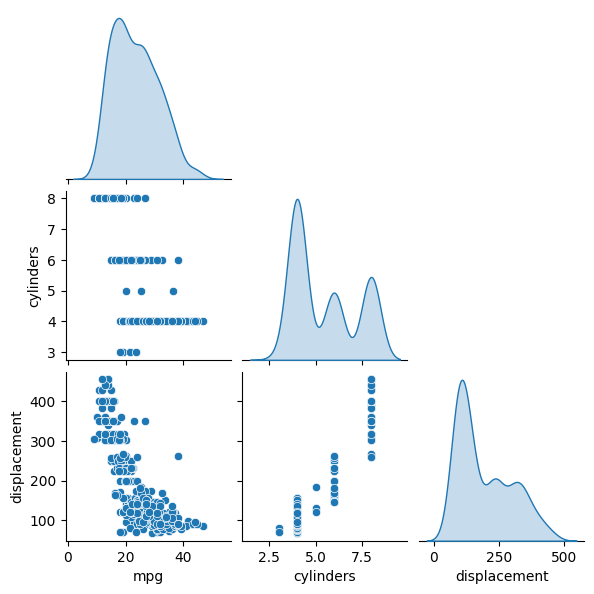

In [29]:
# Scatter plot of the data
sns.pairplot(df, corner=True, diag_kind='kde', kind='scatter', size=2)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X, y = df[['cylinders', 'displacement']], df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding intercept to the model
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 3) (79, 3) (313,) (79,)


In [33]:
# Create a linear regression model ,predict and the metrics MAE, MSE, RMSE
# MAE: Mean Absolute Error (average of the absolute errors)
# MSE: Mean Squared Error (average of the squared errors)
# RMSE: Root Mean Squared Error (square root of the MSE)
# We do the function manually to understand the process

def fit_and_score(model, X_train, X_test, y_train, y_test):
    reg_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y
    predict = lambda X, beta: X @ beta
    mse = lambda y, y_hat: np.mean((y - y_hat)**2)
    rmse = lambda y, y_hat: np.sqrt(mse(y, y_hat))
    mae = lambda y, y_hat: np.mean(np.abs(y - y_hat))
    beta_hat = reg_fit(X_train, y_train)
    y_hat = predict(X_test, beta_hat)
    return {'MAE': mae(y_test, y_hat), 'MSE': mse(y_test, y_hat), 'RMSE': rmse(y_test, y_hat)}

    
# Fit the model and get the metrics with the function

fit_and_score(LinearRegression(), X_train, X_test, y_train, y_test)



{'MAE': 3.669712530523872, 'MSE': 20.95693428276988, 'RMSE': 4.577874428462393}

In [39]:
# Create a linear regression svd model svd is Singular Value Decomposition
# It is a factorization of a matrix into three matrices
# A = U * S * V.T
# U and V are orthogonal matrices and S is a diagonal matrix
# The diagonal elements of S are the singular values of A
# The singular values are the square roots of the eigenvalues of A.T @ A

# The svd is used to compute the pseudo-inverse of a matrix
# Use sklearn's LinearRegression model to fit the data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

model = LinearRegression() # create a linear regression model
model.fit(X_train, y_train) # fit the model
# get the parameters of the model
model.coef_, model.intercept_

# Get the metrics of the model
y_hat = model.predict(X_test)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
mae, mse, rmse


(3.669712530523928, 20.956934282770295, 4.577874428462438)

In [40]:
model1 = LinearRegression()
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit the model
model1.fit(X_train_scaled, y_train)
# Get the metrics
y_hat = model1.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
mae, mse, rmse


(3.669712530523927, 20.95693428277029, 4.5778744284624375)

In [41]:
# Create a polynomial regression model degree 1
from sklearn.preprocessing import PolynomialFeatures
model2 = LinearRegression()
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model2.fit(X_train_poly, y_train)
y_hat = model2.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
mae, mse, rmse

(3.669712530523928, 20.956934282770295, 4.577874428462438)

In [42]:
# Create a polynomial regression model degree 2
model3 = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model3.fit(X_train_poly, y_train)
y_hat = model3.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
mae, mse, rmse

(3.6368475340827504, 20.671205457071817, 4.5465597386454535)

In [43]:
# Create a polynomial regression model degree 3
model4 = LinearRegression()
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model4.fit(X_train_poly, y_train)
y_hat = model4.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = root_mean_squared_error(y_test, y_hat)
mae, mse, rmse

(3.5204423589256195, 18.994158718908853, 4.358228851139973)